In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

data_url = "http://lib.stat.cmu.edu/datasets/boston"
data = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
data["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
X = np.hstack([data.values[::2, :], data.values[1::2, :2]])
y = data.values[1::2, 2]
pipeline = Pipeline([('stan_scale', StandardScaler())])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = pipeline.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=data["feature_names"])

X_test = pipeline.transform(X_test)
X_test = pd.DataFrame(X_test,columns=data["feature_names"])

y_train = pd.DataFrame(y_train,columns=["target"])
y_test = pd.DataFrame(y_test,columns=["target"])

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
X_train.plot(kind='scatter',
             x="LSTAT",
             y='RM',
             color=y_train['target'],
             cmap=plt.get_cmap('autumn_r'),
             ax=ax)
plt.xlabel('LSTAT (% lower status of the population)')
plt.ylabel("RM (average number of rooms per dwelling)")
plt.title("KNN median house value prediction from RM and LSTAT")
plt.savefig('bostonHousingKNNReg1.png', bbox_inches='tight')
plt.show()

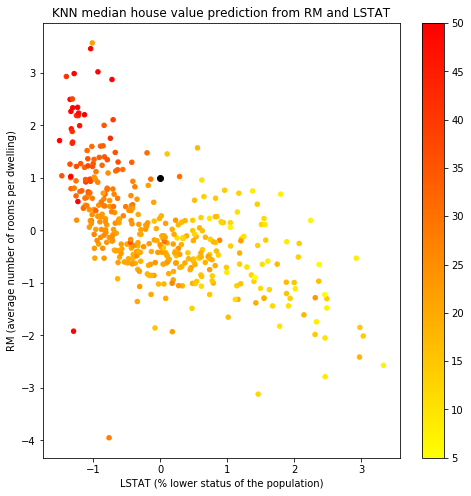

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
X_train.plot(kind='scatter',
             x="LSTAT",
             y='RM',
             color=y_train['target'],
             cmap=plt.get_cmap('autumn_r'),
             ax=ax)
plt.scatter([0], [1], color='black')
plt.xlabel('LSTAT (% lower status of the population)')
plt.ylabel("RM (average number of rooms per dwelling)")
plt.title("KNN median house value prediction from RM and LSTAT")
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train[["LSTAT",'RM']], y_train)
X_new = np.c_[[0], [1]]
pred = knn_reg.predict(np.c_[X,y])
X_train_red = X_train[["LSTAT",'RM']].values
X_train_red = np.append(X_train_red,X_new).reshape(-1,2)

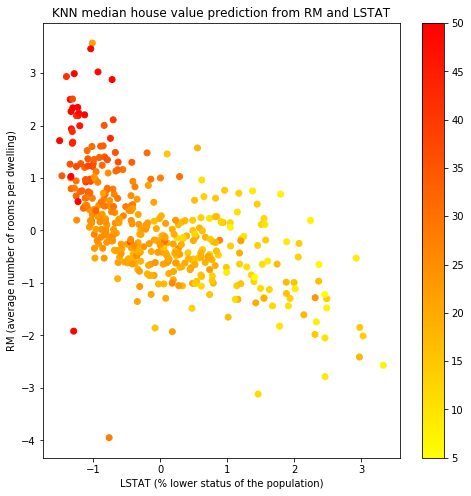

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(x=X_train_red[:, 0],
            y=X_train_red[:, 1],
            c = np.append(y_train['target'],pred),
            cmap=plt.get_cmap('autumn_r'))
plt.xlabel('LSTAT (% lower status of the population)')
plt.ylabel("RM (average number of rooms per dwelling)")
plt.title("KNN median house value prediction from RM and LSTAT")
plt.colorbar()
plt.show()

In [9]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
knn_reg.score(X_test, y_test)

0.5618924285266482